<a href="https://colab.research.google.com/github/Dim0000n/BTCUSD-prediction/blob/main/5M%2B15M_different_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model,save_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import concatenate, Input,Dense,Dropout, BatchNormalization,Flatten,Conv1D,RepeatVector,MaxPooling1D,LSTM,LeakyReLU,Reshape,Conv1DTranspose,Activation,Bidirectional,GRU,Conv1D
from tensorflow.keras import utils

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
x5Test=np.load("/content/drive/MyDrive/UAI/Diploma/DiplomaV2/Sampled_data/5M15M/x5Test.npy")
x15Test=np.load("/content/drive/MyDrive/UAI/Diploma/DiplomaV2/Sampled_data/5M15M/x15Test.npy")
yTest=np.load("/content/drive/MyDrive/UAI/Diploma/DiplomaV2/Sampled_data/5M15M/yTest.npy")
x5Train=np.load("/content/drive/MyDrive/UAI/Diploma/DiplomaV2/Sampled_data/5M15M/x5Train.npy")
x15Train=np.load("/content/drive/MyDrive/UAI/Diploma/DiplomaV2/Sampled_data/5M15M/x15Train.npy")
yTrain=np.load("/content/drive/MyDrive/UAI/Diploma/DiplomaV2/Sampled_data/5M15M/yTrain.npy")
pricesTest=np.load("/content/drive/MyDrive/UAI/Diploma/DiplomaV2/Sampled_data/5M15M/pricesTest.npy")

In [ ]:
def plotHistory(history):
  plt.figure(figsize=(6,4))
  plt.plot(history.history['accuracy'], label='train_accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.legend()
  plt.show()
  plt.plot(history.history['loss'], label='train_loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.legend()
  plt.show()

#Fully-connected

In [ ]:
n=512
drop_rate=0.4

input5=Input(shape=(x5Train.shape[1],x5Train.shape[2]))
x5=Flatten()(input5)

input15=Input(shape=(x15Train.shape[1],x15Train.shape[2]))
x15=Flatten()(input15)

x=concatenate([x5,x15])
x=Dense(n,activation="relu") (x)
x=Dropout(drop_rate)(x)
x=Dense(int(n/2),activation="relu") (x)
x=Dropout(drop_rate)(x)
x=Dense(int(n/4),activation="relu") (x)
x=Dropout(drop_rate)(x)
x=Dense(yTrain.shape[1],activation="sigmoid") (x)

model=Model([input5,input15],x)


Epoch 1/30
423/423 [==============================] - 2s 4ms/step - loss: 0.7118 - accuracy: 0.3460 - val_loss: 0.6356 - val_accuracy: 0.4068
Epoch 2/30
423/423 [==============================] - 2s 4ms/step - loss: 0.6648 - accuracy: 0.3633 - val_loss: 0.6370 - val_accuracy: 0.4211
Epoch 3/30
423/423 [==============================] - 2s 4ms/step - loss: 0.6505 - accuracy: 0.3746 - val_loss: 0.6356 - val_accuracy: 0.4465
Epoch 4/30
423/423 [==============================] - 2s 4ms/step - loss: 0.6424 - accuracy: 0.3884 - val_loss: 0.6339 - val_accuracy: 0.4585
Epoch 5/30
423/423 [==============================] - 2s 4ms/step - loss: 0.6384 - accuracy: 0.4016 - val_loss: 0.6307 - val_accuracy: 0.4692
Epoch 6/30
423/423 [==============================] - 2s 4ms/step - loss: 0.6308 - accuracy: 0.4217 - val_loss: 0.6250 - val_accuracy: 0.4821
Epoch 7/30
423/423 [==============================] - 2s 4ms/step - loss: 0.6237 - accuracy: 0.4320 - val_loss: 0.6205 - val_accuracy: 0.4916
Epoch 

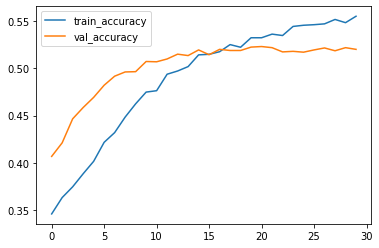

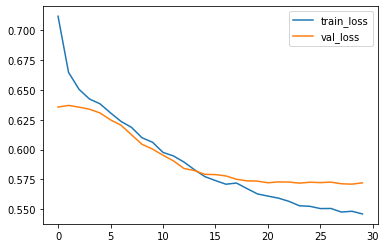

In [ ]:
model.compile(optimizer=Adam(learning_rate=5e-05),loss="binary_crossentropy",metrics=["accuracy"])
history=model.fit([x5Train,x15Train],yTrain,epochs=30,verbose=1,validation_data=([x5Test,x15Test],yTest))
plotHistory(history)

In [ ]:
n=1024
drop_rate=0.4

input5=Input(shape=(x5Train.shape[1],x5Train.shape[2]))
x5=Flatten()(input5)

input15=Input(shape=(x15Train.shape[1],x15Train.shape[2]))
x15=Flatten()(input15)

x=concatenate([x5,x15])
x=Dense(n,activation="relu") (x)
x=Dropout(drop_rate)(x)
x=Dense(int(n/2),activation="relu") (x)
x=Dropout(drop_rate)(x)
x=Dense(int(n/4),activation="relu") (x)
x=Dropout(drop_rate)(x)
x=Dense(yTrain.shape[1],activation="sigmoid") (x)

model=Model([input5,input15],x)

model.compile(optimizer=Adam(learning_rate=5e-05),loss="binary_crossentropy",metrics=["accuracy"])
history=model.fit([x5Train,x15Train],yTrain,epochs=30,verbose=1,validation_data=([x5Test,x15Test],yTest))
plotHistory(history)


Epoch 1/30
423/423 [==============================] - 3s 5ms/step - loss: 0.6796 - accuracy: 0.3646 - val_loss: 0.6291 - val_accuracy: 0.4400
Epoch 2/30
423/423 [==============================] - 2s 5ms/step - loss: 0.6452 - accuracy: 0.3850 - val_loss: 0.6304 - val_accuracy: 0.4585
Epoch 3/30
423/423 [==============================] - 2s 5ms/step - loss: 0.6332 - accuracy: 0.4204 - val_loss: 0.6243 - val_accuracy: 0.4782
Epoch 4/30
423/423 [==============================] - 2s 5ms/step - loss: 0.6217 - accuracy: 0.4382 - val_loss: 0.6152 - val_accuracy: 0.4910
Epoch 5/30
423/423 [==============================] - 2s 5ms/step - loss: 0.6086 - accuracy: 0.4662 - val_loss: 0.6050 - val_accuracy: 0.5096
Epoch 6/30
423/423 [==============================] - 2s 5ms/step - loss: 0.6007 - accuracy: 0.4804 - val_loss: 0.5927 - val_accuracy: 0.5122
Epoch 7/30
423/423 [==============================] - 2s 5ms/step - loss: 0.5889 - accuracy: 0.4942 - val_loss: 0.5883 - val_accuracy: 0.5131
Epoch 

Epoch 1/30
423/423 [==============================] - 3s 5ms/step - loss: 0.7260 - accuracy: 0.3401 - val_loss: 0.6333 - val_accuracy: 0.3990
Epoch 2/30
423/423 [==============================] - 2s 4ms/step - loss: 0.6661 - accuracy: 0.3640 - val_loss: 0.6329 - val_accuracy: 0.4173
Epoch 3/30
423/423 [==============================] - 2s 4ms/step - loss: 0.6519 - accuracy: 0.3747 - val_loss: 0.6332 - val_accuracy: 0.4319
Epoch 4/30
423/423 [==============================] - 2s 4ms/step - loss: 0.6454 - accuracy: 0.3825 - val_loss: 0.6332 - val_accuracy: 0.4415
Epoch 5/30
423/423 [==============================] - 2s 4ms/step - loss: 0.6393 - accuracy: 0.3963 - val_loss: 0.6316 - val_accuracy: 0.4504
Epoch 6/30
423/423 [==============================] - 2s 4ms/step - loss: 0.6352 - accuracy: 0.4078 - val_loss: 0.6285 - val_accuracy: 0.4570
Epoch 7/30
423/423 [==============================] - 2s 4ms/step - loss: 0.6319 - accuracy: 0.4185 - val_loss: 0.6249 - val_accuracy: 0.4689
Epoch 

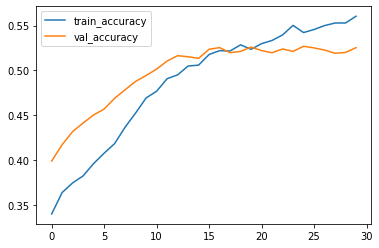

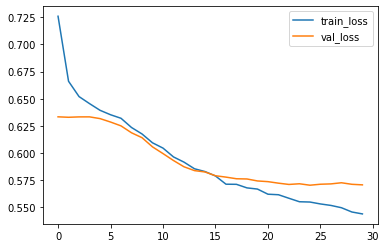

In [ ]:
#softmax 
n=512
drop_rate=0.4

input5=Input(shape=(x5Train.shape[1],x5Train.shape[2]))
x5=Flatten()(input5)

input15=Input(shape=(x15Train.shape[1],x15Train.shape[2]))
x15=Flatten()(input15)

x=concatenate([x5,x15])
x=Dense(n,activation="relu") (x)
x=Dropout(drop_rate)(x)
x=Dense(int(n/2),activation="relu") (x)
x=Dropout(drop_rate)(x)
x=Dense(int(n/4),activation="relu") (x)
x=Dropout(drop_rate)(x)
x=Dense(yTrain.shape[1],activation="softmax") (x)

model=Model([input5,input15],x)

model.compile(optimizer=Adam(learning_rate=5e-05),loss="binary_crossentropy",metrics=["accuracy"])
history=model.fit([x5Train,x15Train],yTrain,epochs=30,verbose=1,validation_data=([x5Test,x15Test],yTest))
plotHistory(history)


Epoch 1/30
423/423 [==============================] - 3s 5ms/step - loss: 0.6755 - accuracy: 0.3664 - val_loss: 0.6211 - val_accuracy: 0.4549
Epoch 2/30
423/423 [==============================] - 2s 5ms/step - loss: 0.6363 - accuracy: 0.4188 - val_loss: 0.6088 - val_accuracy: 0.4854
Epoch 3/30
423/423 [==============================] - 2s 4ms/step - loss: 0.6219 - accuracy: 0.4466 - val_loss: 0.6012 - val_accuracy: 0.4979
Epoch 4/30
423/423 [==============================] - 2s 4ms/step - loss: 0.6135 - accuracy: 0.4649 - val_loss: 0.5954 - val_accuracy: 0.5081
Epoch 5/30
423/423 [==============================] - 2s 4ms/step - loss: 0.6073 - accuracy: 0.4733 - val_loss: 0.5895 - val_accuracy: 0.5057
Epoch 6/30
423/423 [==============================] - 2s 5ms/step - loss: 0.6024 - accuracy: 0.4746 - val_loss: 0.5855 - val_accuracy: 0.5069
Epoch 7/30
423/423 [==============================] - 2s 4ms/step - loss: 0.5968 - accuracy: 0.4907 - val_loss: 0.5839 - val_accuracy: 0.5116
Epoch 

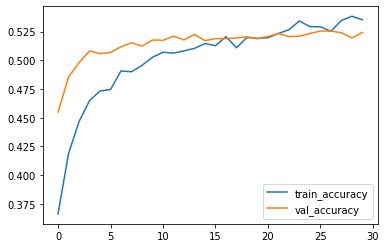

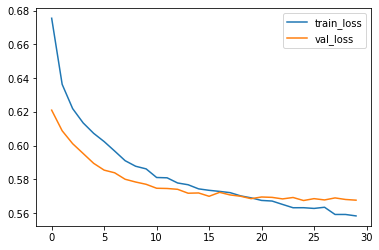

In [ ]:
#2 ветки обработки
#LeakyReLu 
n=256
drop_rate=0.4

input5=Input(shape=(x5Train.shape[1],x5Train.shape[2]))
x5=Flatten()(input5)
x5=Dense(n) (x5)
x5=LeakyReLU()(x5)
x5=Dropout(drop_rate)(x5)
x5=Dense(int(n/2)) (x5)
x5=LeakyReLU()(x5)
x5=Dropout(drop_rate)(x5)

input15=Input(shape=(x15Train.shape[1],x15Train.shape[2]))
x15=Flatten()(input15)
x15=Dense(int(n)) (x15)
x15=LeakyReLU()(x15)
x15=Dropout(drop_rate)(x15)
x15=Dense(n) (x15)
x15=LeakyReLU()(x15)

x=concatenate([x5,x15])
x=Dense(n) (x)
x=LeakyReLU()(x)

x=Dense(int(n/2)) (x)
x=LeakyReLU()(x)
x=Dropout(drop_rate)(x)
x=Dense(yTrain.shape[1],activation="sigmoid") (x)

model=Model([input5,input15],x)

model.compile(optimizer=Adam(learning_rate=5e-05),loss="binary_crossentropy",metrics=["accuracy"])
history=model.fit([x5Train,x15Train],yTrain,epochs=30,verbose=1,validation_data=([x5Test,x15Test],yTest))
plotHistory(history)


Epoch 1/30
423/423 [==============================] - 3s 5ms/step - loss: 1.0753 - accuracy: 0.3603 - val_loss: 0.6081 - val_accuracy: 0.4901
Epoch 2/30
423/423 [==============================] - 2s 5ms/step - loss: 0.8436 - accuracy: 0.4029 - val_loss: 0.5946 - val_accuracy: 0.4973
Epoch 3/30
423/423 [==============================] - 2s 4ms/step - loss: 0.7771 - accuracy: 0.4105 - val_loss: 0.5917 - val_accuracy: 0.5072
Epoch 4/30
423/423 [==============================] - 2s 4ms/step - loss: 0.7358 - accuracy: 0.4259 - val_loss: 0.5859 - val_accuracy: 0.5033
Epoch 5/30
423/423 [==============================] - 2s 4ms/step - loss: 0.7078 - accuracy: 0.4374 - val_loss: 0.5825 - val_accuracy: 0.5078
Epoch 6/30
423/423 [==============================] - 2s 4ms/step - loss: 0.6996 - accuracy: 0.4379 - val_loss: 0.5806 - val_accuracy: 0.5167
Epoch 7/30
423/423 [==============================] - 2s 4ms/step - loss: 0.6752 - accuracy: 0.4531 - val_loss: 0.5797 - val_accuracy: 0.5200
Epoch 

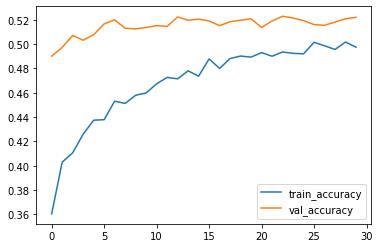

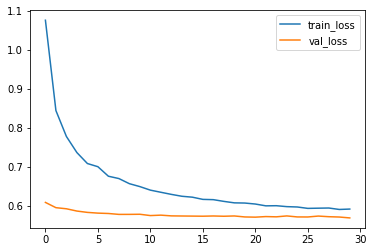

In [ ]:
#2 ветки обработки
#Linear 
n=256
drop_rate=0.4

input5=Input(shape=(x5Train.shape[1],x5Train.shape[2]))
x5=Flatten()(input5)
x5=Dense(n,activation="linear") (x5)

x5=Dropout(drop_rate)(x5)
x5=Dense(int(n/2),activation="linear") (x5)
x5=Dropout(drop_rate)(x5)

input15=Input(shape=(x15Train.shape[1],x15Train.shape[2]))
x15=Flatten()(input15)
x15=Dense(int(n),activation="linear") (x15)

x15=Dropout(drop_rate)(x15)
x15=Dense(n,activation="linear") (x15)

x=concatenate([x5,x15])
x=Dense(n,activation="linear") (x)


x=Dense(int(n/2),activation="linear") (x)

x=Dropout(drop_rate)(x)
x=Dense(yTrain.shape[1],activation="sigmoid") (x)

model=Model([input5,input15],x)

model.compile(optimizer=Adam(learning_rate=5e-05),loss="binary_crossentropy",metrics=["accuracy"])
history=model.fit([x5Train,x15Train],yTrain,epochs=30,verbose=1,validation_data=([x5Test,x15Test],yTest))
plotHistory(history)

#LSTM

Epoch 1/100
423/423 [==============================] - 12s 10ms/step - loss: 0.6805 - accuracy: 0.3217 - val_loss: 0.6748 - val_accuracy: 0.2966
Epoch 2/100
423/423 [==============================] - 3s 8ms/step - loss: 0.6570 - accuracy: 0.3452 - val_loss: 0.6514 - val_accuracy: 0.3638
Epoch 3/100
423/423 [==============================] - 3s 8ms/step - loss: 0.6397 - accuracy: 0.3570 - val_loss: 0.6350 - val_accuracy: 0.3659
Epoch 4/100
423/423 [==============================] - 3s 8ms/step - loss: 0.6350 - accuracy: 0.3589 - val_loss: 0.6311 - val_accuracy: 0.3686
Epoch 5/100
423/423 [==============================] - 3s 8ms/step - loss: 0.6343 - accuracy: 0.3582 - val_loss: 0.6302 - val_accuracy: 0.3713
Epoch 6/100
423/423 [==============================] - 3s 8ms/step - loss: 0.6340 - accuracy: 0.3602 - val_loss: 0.6295 - val_accuracy: 0.3746
Epoch 7/100
423/423 [==============================] - 3s 8ms/step - loss: 0.6338 - accuracy: 0.3602 - val_loss: 0.6292 - val_accuracy: 0.37

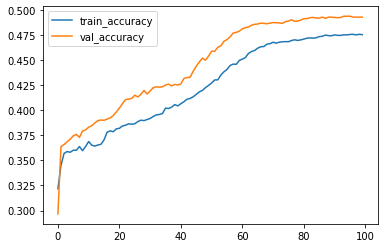

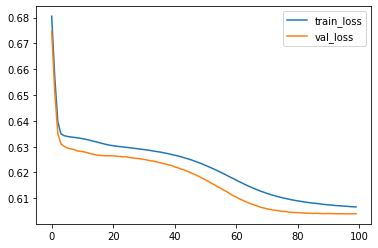

In [ ]:
input5=Input(shape=(x5Train.shape[1],x5Train.shape[2]))
x5=LSTM(16,return_sequences=True)(input5)
x5=LSTM(8)(x5)
x5=Flatten()(x5)

input15=Input(shape=(x15Train.shape[1],x15Train.shape[2]))
x15=LSTM(8,return_sequences=True) (input15)
x15=LSTM(4) (x15)
x15=Flatten()(x15)

x=concatenate([x5,x15])
x=Dense(100)(x)
x=LeakyReLU() (x)
x=Dense(yTrain.shape[1],activation="sigmoid") (x)

model=Model([input5,input15],x)
model.compile(optimizer=Adam(learning_rate=5e-05),loss="binary_crossentropy",metrics=["accuracy"])
history=model.fit([x5Train,x15Train],yTrain,epochs=100,verbose=1,validation_data=([x5Test,x15Test],yTest))
plotHistory(history)


Epoch 1/100
423/423 [==============================] - 3s 8ms/step - loss: 0.6066 - accuracy: 0.4761 - val_loss: 0.6040 - val_accuracy: 0.4922
Epoch 2/100
423/423 [==============================] - 4s 9ms/step - loss: 0.6065 - accuracy: 0.4767 - val_loss: 0.6040 - val_accuracy: 0.4925
Epoch 3/100
423/423 [==============================] - 3s 8ms/step - loss: 0.6064 - accuracy: 0.4758 - val_loss: 0.6039 - val_accuracy: 0.4931
Epoch 4/100
423/423 [==============================] - 3s 8ms/step - loss: 0.6063 - accuracy: 0.4773 - val_loss: 0.6039 - val_accuracy: 0.4931
Epoch 5/100
423/423 [==============================] - 3s 8ms/step - loss: 0.6063 - accuracy: 0.4765 - val_loss: 0.6040 - val_accuracy: 0.4940
Epoch 6/100
423/423 [==============================] - 3s 8ms/step - loss: 0.6062 - accuracy: 0.4767 - val_loss: 0.6041 - val_accuracy: 0.4940
Epoch 7/100
423/423 [==============================] - 3s 8ms/step - loss: 0.6062 - accuracy: 0.4772 - val_loss: 0.6039 - val_accuracy: 0.4940

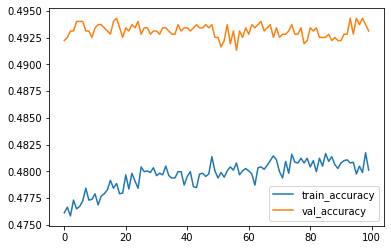

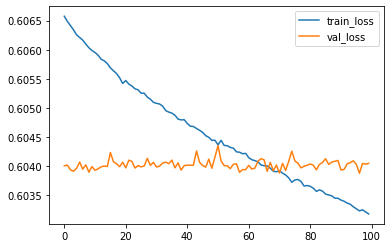

In [ ]:
history=model.fit([x5Train,x15Train],yTrain,epochs=100,verbose=1,validation_data=([x5Test,x15Test],yTest))
plotHistory(history)

Epoch 1/100
423/423 [==============================] - 15s 23ms/step - loss: 0.6503 - accuracy: 0.3580 - val_loss: 0.6281 - val_accuracy: 0.3734
Epoch 2/100
423/423 [==============================] - 8s 19ms/step - loss: 0.6322 - accuracy: 0.3719 - val_loss: 0.6271 - val_accuracy: 0.3919
Epoch 3/100
423/423 [==============================] - 8s 19ms/step - loss: 0.6309 - accuracy: 0.3843 - val_loss: 0.6274 - val_accuracy: 0.3865
Epoch 4/100
423/423 [==============================] - 8s 19ms/step - loss: 0.6303 - accuracy: 0.3836 - val_loss: 0.6265 - val_accuracy: 0.4029
Epoch 5/100
423/423 [==============================] - 8s 19ms/step - loss: 0.6298 - accuracy: 0.3908 - val_loss: 0.6260 - val_accuracy: 0.4050
Epoch 6/100
423/423 [==============================] - 8s 19ms/step - loss: 0.6292 - accuracy: 0.4004 - val_loss: 0.6266 - val_accuracy: 0.3999
Epoch 7/100
423/423 [==============================] - 8s 19ms/step - loss: 0.6286 - accuracy: 0.4006 - val_loss: 0.6263 - val_accuracy

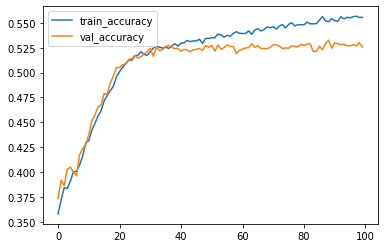

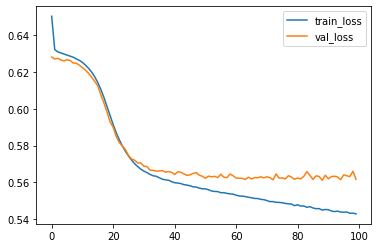

In [ ]:
input5=Input(shape=(x5Train.shape[1],x5Train.shape[2]))
x5=LSTM(64,return_sequences=True)(input5)
x5=LSTM(32)(x5)
x5=Flatten()(x5)

input15=Input(shape=(x15Train.shape[1],x15Train.shape[2]))
x15=LSTM(32,return_sequences=True) (input15)
x15=LSTM(16) (x15)

x15=Flatten()(x15)

x=concatenate([x5,x15])
x=Dense(100)(x)
x=LeakyReLU() (x)
x=Dense(yTrain.shape[1],activation="sigmoid") (x)

model=Model([input5,input15],x)
model.compile(optimizer=Adam(learning_rate=5e-05),loss="binary_crossentropy",metrics=["accuracy"])
history=model.fit([x5Train,x15Train],yTrain,epochs=100,verbose=1,validation_data=([x5Test,x15Test],yTest))
plotHistory(history)

Epoch 1/100
423/423 [==============================] - 35s 47ms/step - loss: 0.6451 - accuracy: 0.3749 - val_loss: 0.6269 - val_accuracy: 0.4188
Epoch 2/100
423/423 [==============================] - 16s 38ms/step - loss: 0.6295 - accuracy: 0.4052 - val_loss: 0.6248 - val_accuracy: 0.4394
Epoch 3/100
423/423 [==============================] - 16s 38ms/step - loss: 0.6265 - accuracy: 0.4303 - val_loss: 0.6222 - val_accuracy: 0.4513
Epoch 4/100
423/423 [==============================] - 16s 38ms/step - loss: 0.6224 - accuracy: 0.4511 - val_loss: 0.6179 - val_accuracy: 0.4677
Epoch 5/100
423/423 [==============================] - 16s 37ms/step - loss: 0.6166 - accuracy: 0.4713 - val_loss: 0.6123 - val_accuracy: 0.4776
Epoch 6/100
423/423 [==============================] - 16s 38ms/step - loss: 0.6098 - accuracy: 0.4801 - val_loss: 0.6072 - val_accuracy: 0.4821
Epoch 7/100
423/423 [==============================] - 16s 38ms/step - loss: 0.6029 - accuracy: 0.4855 - val_loss: 0.6016 - val_ac

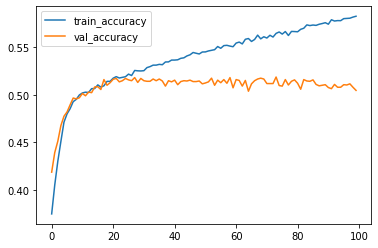

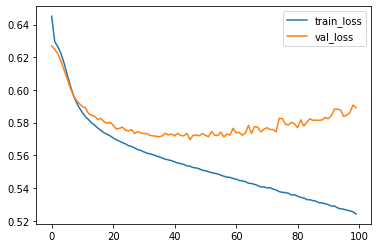

In [ ]:
input5=Input(shape=(x5Train.shape[1],x5Train.shape[2]))
x5=Bidirectional(LSTM(64,return_sequences=True))(input5)
x5=Bidirectional(LSTM(32))(x5)
x5=Flatten()(x5)

input15=Input(shape=(x15Train.shape[1],x15Train.shape[2]))
x15=Bidirectional(LSTM(32,return_sequences=True)) (input15)
x15=Bidirectional(LSTM(16)) (x15)

x15=Flatten()(x15)

x=concatenate([x5,x15])
x=Dense(100)(x)
x=LeakyReLU() (x)
x=Dense(yTrain.shape[1],activation="sigmoid") (x)

model=Model([input5,input15],x)
model.compile(optimizer=Adam(learning_rate=5e-05),loss="binary_crossentropy",metrics=["accuracy"])
history=model.fit([x5Train,x15Train],yTrain,epochs=100,verbose=1,validation_data=([x5Test,x15Test],yTest))
plotHistory(history)

#unet

In [ ]:
n=64
kernel=3
kernel_trans=2
act="relu"
drop=0.6

input5=Input(shape=(x5Train.shape[1],x5Train.shape[2]))
x5=Flatten()(input5)
x5=Dense(286) (x5)
x5=Activation(act)(x5)
x5=Dropout(drop)(x5)

input15=Input(shape=(x15Train.shape[1],x15Train.shape[2]))
x15=Flatten()(input15)
x15=Dense(114) (x15)
x15=Activation(act)(x15)
x15=Dropout(drop) (x15)

x=concatenate([x5,x15])
x=Reshape((-1,1)) (x)

#block1
x=Conv1D(n,kernel,padding="same") (x)
x=BatchNormalization()(x)
x=Activation(act) (x)

x=Conv1D(n,kernel,padding="same") (x)
x=BatchNormalization()(x)
block1_out=Activation(act) (x)

x=MaxPooling1D()(block1_out)

#block2
x=Conv1D(n*2,kernel,padding="same") (x)
x=BatchNormalization()(x)
x=Activation(act) (x)

x=Conv1D(n*2,kernel,padding="same") (x)
x=BatchNormalization()(x)
block2_out=Activation(act) (x)

x=MaxPooling1D()(block2_out)

#block3
x=Conv1D(n*4,kernel,padding="same") (x)
x=BatchNormalization()(x)
x=Activation(act) (x)

x=Conv1D(n*4,kernel,padding="same") (x)
x=BatchNormalization()(x)
block3_out=Activation(act) (x)

x=MaxPooling1D()(block3_out)

#block4
x=Conv1D(n*8,kernel,padding="same") (x)
x=BatchNormalization()(x)
x=Activation(act) (x)

x=Conv1D(n*8,kernel,padding="same") (x)
x=BatchNormalization()(x)
block4_out=Activation(act) (x)

x=block4_out

#UP2
x=Conv1DTranspose(n*4,kernel_trans,strides=2,padding="same") (x)
x=BatchNormalization()(x)
x=Activation(act) (x)

x=concatenate([x,block3_out])

x=Conv1D(n*4,kernel,padding="same") (x)
x=BatchNormalization()(x)
x=Activation(act) (x)

x=Conv1D(n*4,kernel,padding="same") (x)
x=BatchNormalization()(x)
x=Activation(act) (x)

#UP3
x=Conv1DTranspose(n*2,kernel_trans,strides=2,padding="same") (x)
x=BatchNormalization()(x)
x=Activation(act) (x)

x=concatenate([x,block2_out])

x=Conv1D(n*2,kernel,padding="same") (x)
x=BatchNormalization()(x)
x=Activation(act) (x)

x=Conv1D(n*2,kernel,padding="same") (x)
x=BatchNormalization()(x)
x=Activation(act) (x)

#up4
x=Conv1DTranspose(n,kernel_trans,strides=2,padding="same") (x)
x=BatchNormalization()(x)
x=Activation(act) (x)

x=concatenate([x,block1_out])

x=Conv1D(n,kernel,padding="same") (x)
x=BatchNormalization()(x)
x=Activation(act) (x)

x=Conv1D(n,kernel,padding="same") (x)
x=BatchNormalization()(x)
x=Activation(act) (x)

x=Flatten()(x)

x=Dense(n*2)(x)
x=Dropout(drop) (x)
x=Activation(act)(x)

x=Dense(yTrain.shape[1],activation="sigmoid") (x)

model=Model([input5,input15],x)





Epoch 1/30
423/423 [==============================] - 45s 94ms/step - loss: 0.6609 - accuracy: 0.3575 - val_loss: 0.6340 - val_accuracy: 0.3934
Epoch 2/30
423/423 [==============================] - 39s 92ms/step - loss: 0.6504 - accuracy: 0.3666 - val_loss: 0.6312 - val_accuracy: 0.3731
Epoch 3/30
423/423 [==============================] - 39s 91ms/step - loss: 0.6471 - accuracy: 0.3743 - val_loss: 0.6322 - val_accuracy: 0.3743
Epoch 4/30
423/423 [==============================] - 39s 91ms/step - loss: 0.6462 - accuracy: 0.3737 - val_loss: 0.6283 - val_accuracy: 0.4170
Epoch 5/30
423/423 [==============================] - 38s 91ms/step - loss: 0.6431 - accuracy: 0.3891 - val_loss: 0.6300 - val_accuracy: 0.3811
Epoch 6/30
423/423 [==============================] - 38s 91ms/step - loss: 0.6432 - accuracy: 0.3828 - val_loss: 0.6277 - val_accuracy: 0.4295
Epoch 7/30
423/423 [==============================] - 38s 91ms/step - loss: 0.6420 - accuracy: 0.3964 - val_loss: 0.6273 - val_accuracy:

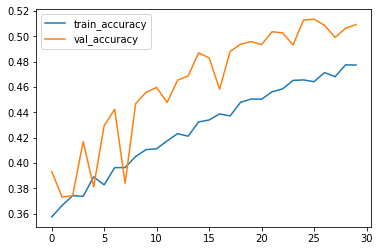

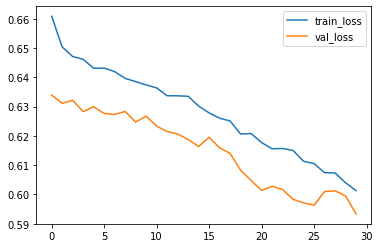

In [ ]:
model.compile(optimizer=Adam(learning_rate=5e-05),loss="binary_crossentropy",metrics=["accuracy"])
history=model.fit([x5Train,x15Train],yTrain,epochs=30,verbose=1,validation_data=([x5Test,x15Test],yTest))
plotHistory(history)

In [ ]:
n=64
kernel=3
kernel_trans=2
act="linear"
drop=0.6

input5=Input(shape=(x5Train.shape[1],x5Train.shape[2]))
x5=Flatten()(input5)
x5=Dense(286) (x5)
x5=Activation(act)(x5)
x5=Dropout(drop)(x5)

input15=Input(shape=(x15Train.shape[1],x15Train.shape[2]))
x15=Flatten()(input15)
x15=Dense(114) (x15)
x15=Activation(act)(x15)
x15=Dropout(drop) (x15)

x=concatenate([x5,x15])
x=Reshape((-1,1)) (x)

#block1
x=Conv1D(n,kernel,padding="same") (x)
x=BatchNormalization()(x)
x=Activation(act) (x)

x=Conv1D(n,kernel,padding="same") (x)
x=BatchNormalization()(x)
block1_out=Activation(act) (x)

x=MaxPooling1D()(block1_out)

#block2
x=Conv1D(n*2,kernel,padding="same") (x)
x=BatchNormalization()(x)
x=Activation(act) (x)

x=Conv1D(n*2,kernel,padding="same") (x)
x=BatchNormalization()(x)
block2_out=Activation(act) (x)

x=MaxPooling1D()(block2_out)

#block3
x=Conv1D(n*4,kernel,padding="same") (x)
x=BatchNormalization()(x)
x=Activation(act) (x)

x=Conv1D(n*4,kernel,padding="same") (x)
x=BatchNormalization()(x)
block3_out=Activation(act) (x)

x=MaxPooling1D()(block3_out)

#block4
x=Conv1D(n*8,kernel,padding="same") (x)
x=BatchNormalization()(x)
x=Activation(act) (x)

x=Conv1D(n*8,kernel,padding="same") (x)
x=BatchNormalization()(x)
block4_out=Activation(act) (x)

x=block4_out

#UP2
x=Conv1DTranspose(n*4,kernel_trans,strides=2,padding="same") (x)
x=BatchNormalization()(x)
x=Activation(act) (x)

x=concatenate([x,block3_out])

x=Conv1D(n*4,kernel,padding="same") (x)
x=BatchNormalization()(x)
x=Activation(act) (x)

x=Conv1D(n*4,kernel,padding="same") (x)
x=BatchNormalization()(x)
x=Activation(act) (x)

#UP3
x=Conv1DTranspose(n*2,kernel_trans,strides=2,padding="same") (x)
x=BatchNormalization()(x)
x=Activation(act) (x)

x=concatenate([x,block2_out])

x=Conv1D(n*2,kernel,padding="same") (x)
x=BatchNormalization()(x)
x=Activation(act) (x)

x=Conv1D(n*2,kernel,padding="same") (x)
x=BatchNormalization()(x)
x=Activation(act) (x)

#up4
x=Conv1DTranspose(n,kernel_trans,strides=2,padding="same") (x)
x=BatchNormalization()(x)
x=Activation(act) (x)

x=concatenate([x,block1_out])

x=Conv1D(n,kernel,padding="same") (x)
x=BatchNormalization()(x)
x=Activation(act) (x)

x=Conv1D(n,kernel,padding="same") (x)
x=BatchNormalization()(x)
x=Activation(act) (x)

x=Flatten()(x)

x=Dense(n*2)(x)
x=Dropout(drop) (x)
x=Activation(act)(x)

x=Dense(yTrain.shape[1],activation="sigmoid") (x)

model=Model([input5,input15],x)

Epoch 1/30
423/423 [==============================] - 44s 92ms/step - loss: 1.2013 - accuracy: 0.3717 - val_loss: 0.7080 - val_accuracy: 0.4403
Epoch 2/30
423/423 [==============================] - 38s 89ms/step - loss: 1.1236 - accuracy: 0.3862 - val_loss: 0.7101 - val_accuracy: 0.4247
Epoch 3/30
423/423 [==============================] - 38s 89ms/step - loss: 1.0415 - accuracy: 0.3865 - val_loss: 0.7073 - val_accuracy: 0.4418
Epoch 4/30
423/423 [==============================] - 38s 89ms/step - loss: 1.0074 - accuracy: 0.3931 - val_loss: 0.7123 - val_accuracy: 0.3787
Epoch 5/30
423/423 [==============================] - 38s 89ms/step - loss: 0.9465 - accuracy: 0.4013 - val_loss: 0.6461 - val_accuracy: 0.4812
Epoch 6/30
423/423 [==============================] - 38s 89ms/step - loss: 0.9074 - accuracy: 0.3980 - val_loss: 0.6416 - val_accuracy: 0.4665
Epoch 7/30
423/423 [==============================] - 38s 89ms/step - loss: 0.8647 - accuracy: 0.4048 - val_loss: 0.6358 - val_accuracy:

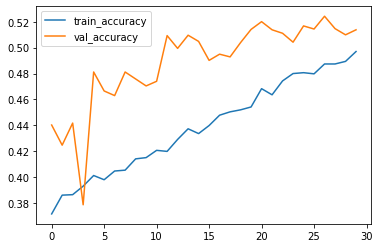

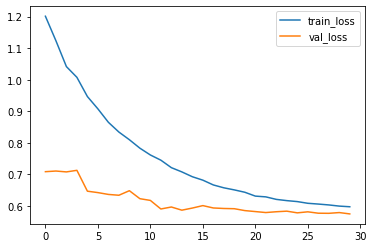

In [ ]:
model.compile(optimizer=Adam(learning_rate=5e-05),loss="binary_crossentropy",metrics=["accuracy"])
history=model.fit([x5Train,x15Train],yTrain,epochs=30,verbose=1,validation_data=([x5Test,x15Test],yTest))
plotHistory(history)

#LSTM+CNN

Epoch 1/100
423/423 [==============================] - 46s 25ms/step - loss: 0.6421 - accuracy: 0.3578 - val_loss: 0.6278 - val_accuracy: 0.3763
Epoch 2/100
423/423 [==============================] - 9s 20ms/step - loss: 0.6319 - accuracy: 0.3669 - val_loss: 0.6279 - val_accuracy: 0.3838
Epoch 3/100
423/423 [==============================] - 9s 21ms/step - loss: 0.6312 - accuracy: 0.3777 - val_loss: 0.6267 - val_accuracy: 0.3955
Epoch 4/100
423/423 [==============================] - 9s 20ms/step - loss: 0.6305 - accuracy: 0.3811 - val_loss: 0.6283 - val_accuracy: 0.3746
Epoch 5/100
423/423 [==============================] - 9s 20ms/step - loss: 0.6305 - accuracy: 0.3788 - val_loss: 0.6263 - val_accuracy: 0.4086
Epoch 6/100
423/423 [==============================] - 9s 20ms/step - loss: 0.6298 - accuracy: 0.3828 - val_loss: 0.6261 - val_accuracy: 0.4038
Epoch 7/100
423/423 [==============================] - 9s 20ms/step - loss: 0.6290 - accuracy: 0.3891 - val_loss: 0.6259 - val_accuracy

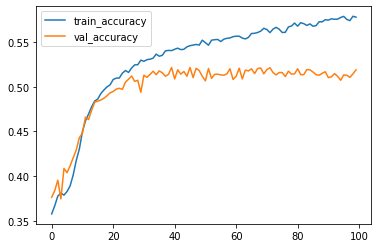

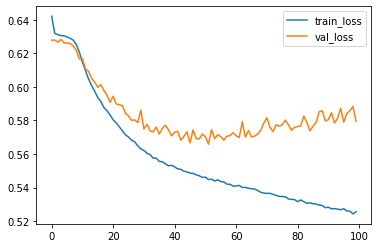

In [ ]:
n_steps=19
drop=0.4

input5=Input(shape=(x5Train.shape[1],x5Train.shape[2]))
x5=LSTM(64,return_sequences=True)(input5)
x5=LSTM(32)(x5)
x5=Flatten()(x5)

input15=Input(shape=(x15Train.shape[1],x15Train.shape[2]))
x15=LSTM(32,return_sequences=True) (input15)
x15=LSTM(16) (x15)

x15=Flatten()(x15)

x=concatenate([x5,x15])
x=RepeatVector(4)(x)
x=Conv1D(n_steps*2,5,padding="same",activation="relu")(x)
x=MaxPooling1D(pool_size=2)(x)
x=Flatten()(x)
x=RepeatVector(4)(x)
x = Conv1D(n_steps, 5, padding='same', activation='relu')(x)
x = MaxPooling1D(pool_size=2)(x)
x = Flatten()(x)
x = Dense(n_steps*100, activation='relu')(x)
x = Dropout(drop)(x)
x = Dense(yTrain.shape[1], activation='sigmoid')(x)
model = Model([input5,input15], x)

model.compile(optimizer=Adam(learning_rate=5e-05),loss="binary_crossentropy",metrics=["accuracy"])
history=model.fit([x5Train,x15Train],yTrain,epochs=100,verbose=1,validation_data=([x5Test,x15Test],yTest))
plotHistory(history)

#GRU

Epoch 1/100
423/423 [==============================] - 46s 101ms/step - loss: 0.6494 - accuracy: 0.3670 - val_loss: 0.6293 - val_accuracy: 0.3919
Epoch 2/100
423/423 [==============================] - 41s 97ms/step - loss: 0.6342 - accuracy: 0.3740 - val_loss: 0.6279 - val_accuracy: 0.3958
Epoch 3/100
423/423 [==============================] - 41s 97ms/step - loss: 0.6327 - accuracy: 0.3769 - val_loss: 0.6274 - val_accuracy: 0.3916
Epoch 4/100
423/423 [==============================] - 41s 97ms/step - loss: 0.6321 - accuracy: 0.3776 - val_loss: 0.6270 - val_accuracy: 0.3910
Epoch 5/100
423/423 [==============================] - 41s 96ms/step - loss: 0.6318 - accuracy: 0.3812 - val_loss: 0.6268 - val_accuracy: 0.3946
Epoch 6/100
423/423 [==============================] - 40s 96ms/step - loss: 0.6315 - accuracy: 0.3806 - val_loss: 0.6272 - val_accuracy: 0.3934
Epoch 7/100
423/423 [==============================] - 40s 95ms/step - loss: 0.6308 - accuracy: 0.3841 - val_loss: 0.6272 - val_a

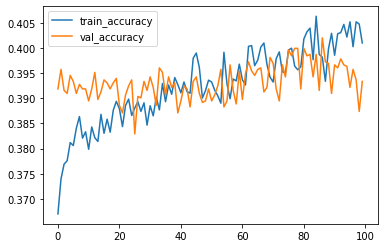

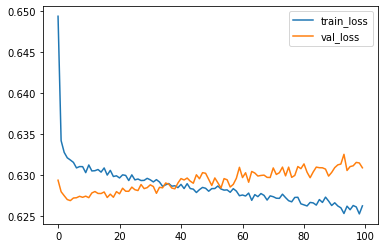

In [ ]:
input5=Input(shape=(x5Train.shape[1],x5Train.shape[2]))
x5=GRU(160,dropout=0.4,recurrent_dropout=0.4, return_sequences=True)(input5)
x5=GRU(80,dropout=0.4,recurrent_dropout=0.4)(x5)
x5=LeakyReLU()(x5)
x5=Flatten()(x5)

input15=Input(shape=(x15Train.shape[1],x15Train.shape[2]))
x15=GRU(80,dropout=0.2,recurrent_dropout=0.2,return_sequences=True)(input15)
x15=GRU(40,dropout=0.4,recurrent_dropout=0.4)(x15)
x15=LeakyReLU()(x5)

x15=Flatten()(x15)

x=concatenate([x5,x15])
x=Dense(100)(x)
x=LeakyReLU() (x)
x=Dense(yTrain.shape[1],activation="sigmoid") (x)

model=Model([input5,input15],x)
model.compile(optimizer=Adam(learning_rate=5e-05),loss="binary_crossentropy",metrics=["accuracy"])
history=model.fit([x5Train,x15Train],yTrain,epochs=100,verbose=1,validation_data=([x5Test,x15Test],yTest))
plotHistory(history)